In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bird Strikes.csv')
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [6]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,Number of people injured
count,25558.000000,25558.000000,25558.000000
mean,253916.085609,2.691525,0.001056
std,38510.453382,12.793975,0.050420
min,1195.000000,1.000000,0.000000
25%,225783.750000,1.000000,0.000000
50%,248749.000000,1.000000,0.000000
75%,269168.750000,1.000000,0.000000
max,321909.000000,942.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

#### Visualize Number of Bird Strikes over the years

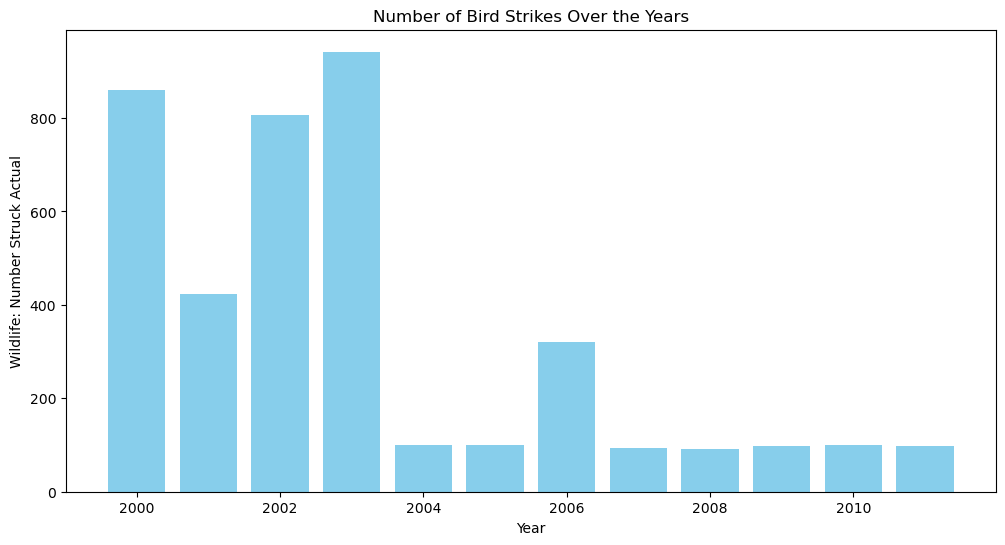

In [9]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Wildlife: Number Struck Actual')
plt.title('Number of Bird Strikes Over the Years')
plt.show()

#### Yearly Analysis & Bird Strikes in the US

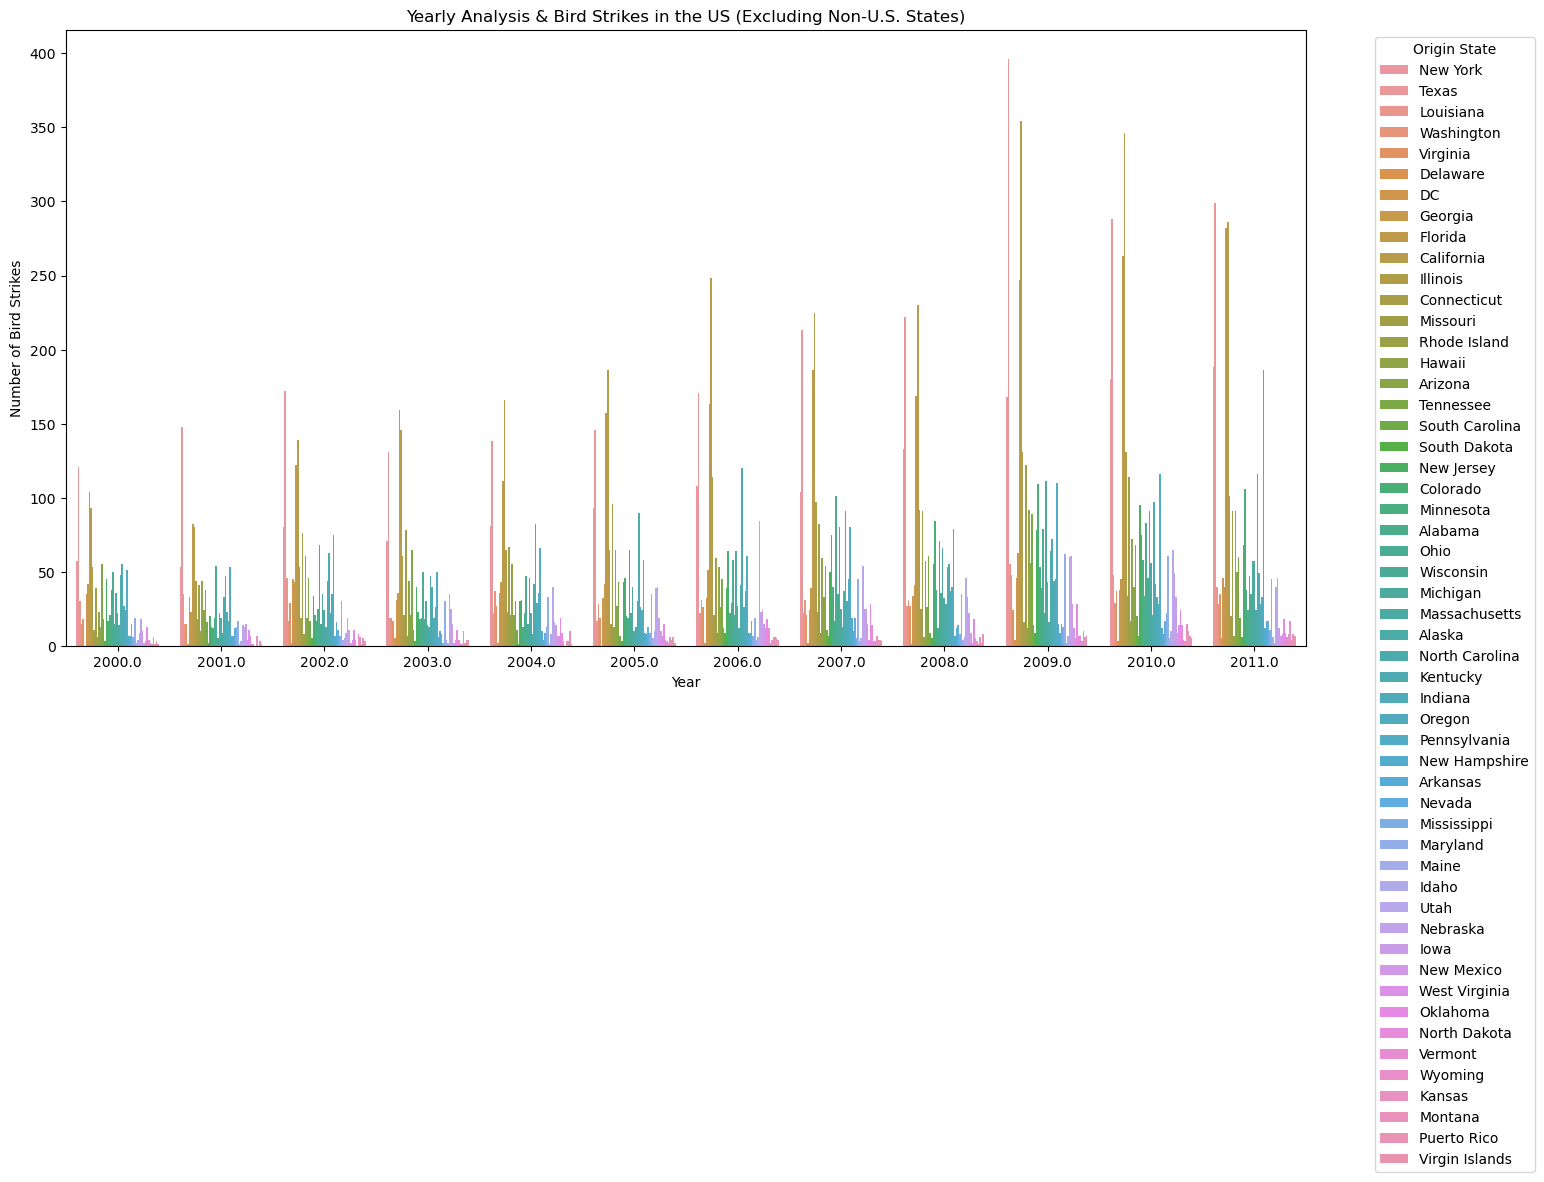

In [10]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Extract year from 'FlightDate'
df['Year'] = df['FlightDate'].dt.year

# List of non-U.S. states and territories to exclude
non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario', 
                  'Newfoundland and Labrador', 'Alberta', 'Saskatchewan']

df_us = df[~df['Origin State'].isin(non_us_states)]   # Filter rows where 'Origin State' is not in the non-U.S. states list


plt.figure(figsize=(16, 8))
sns.countplot(x='Year', hue='Origin State', data=df_us)
plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Top 10 US Airlines in terms of having encountered bird strikes

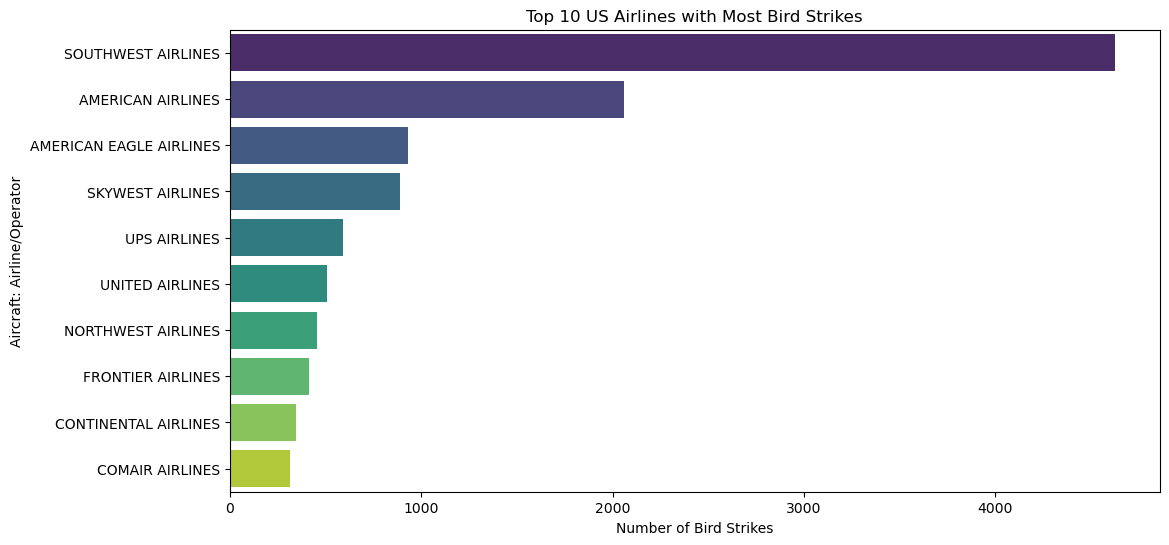

In [11]:
df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]

# Plot the top 10 U.S. airlines with the most bird strikes
plt.figure(figsize=(12, 6))
top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft: Airline/Operator')
plt.show()

#### Airports with most incidents of bird strikes – Top 50


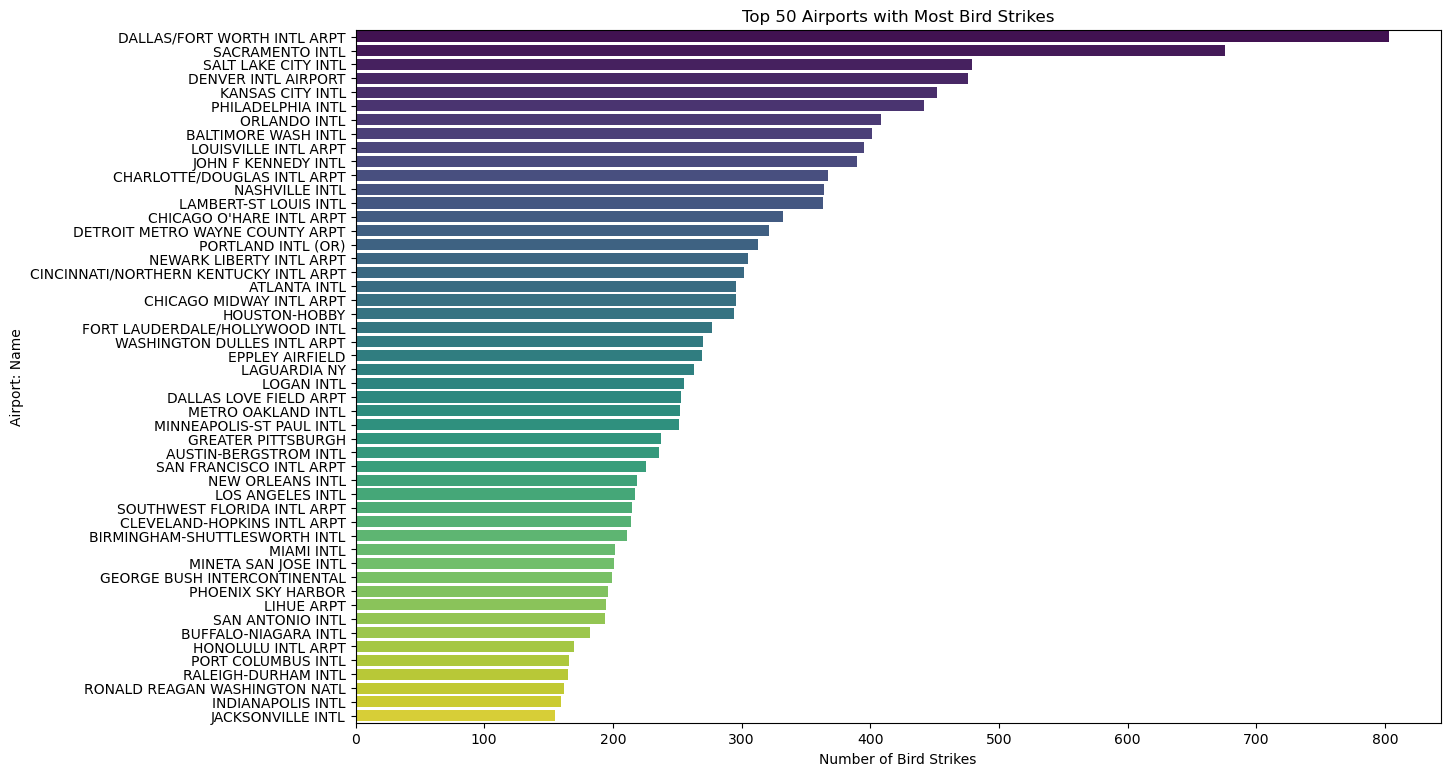

In [12]:
plt.figure(figsize=(14, 9))
top_airports = df['Airport: Name'].value_counts().nlargest(50)
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport: Name')
plt.show()


#### Yearly Cost Incurred due to Bird Strikes:


C:\Users\admin\AppData\Local\Temp\ipykernel_3448\3821989578.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')


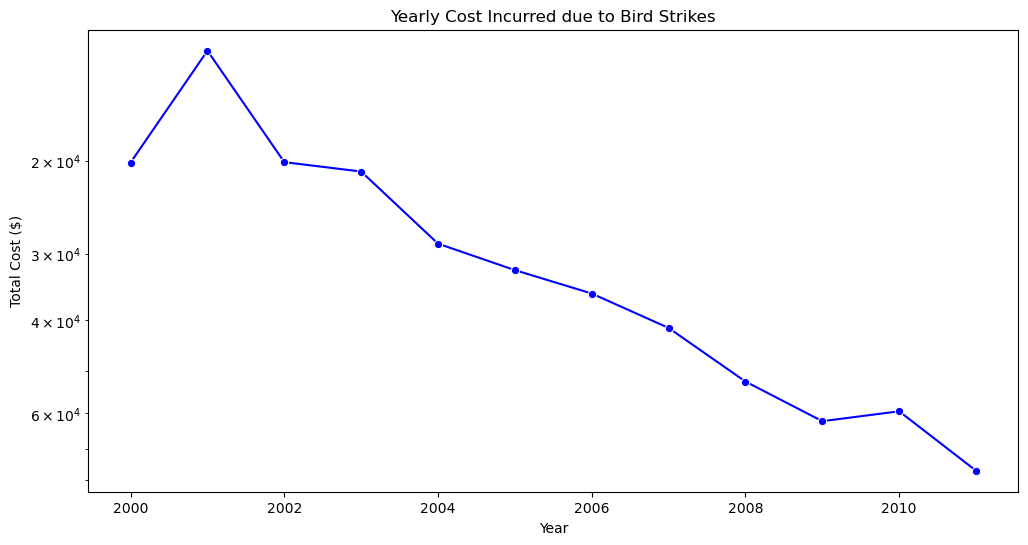

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')
plt.yscale('log')  # Using a logarithmic scale
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

#### When do most bird strikes occur?

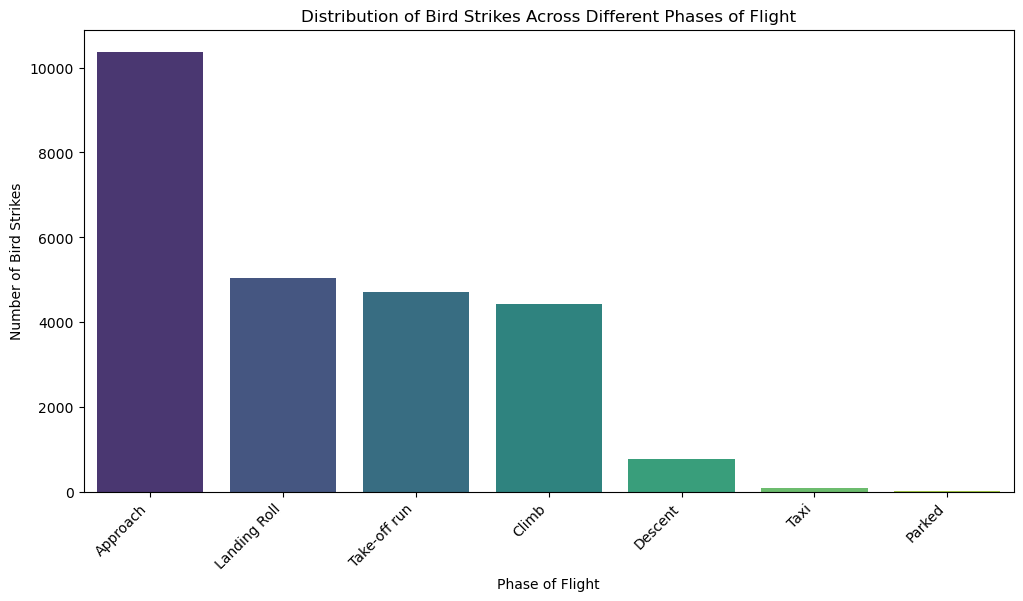

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Altitude of aeroplanes at the time of strike


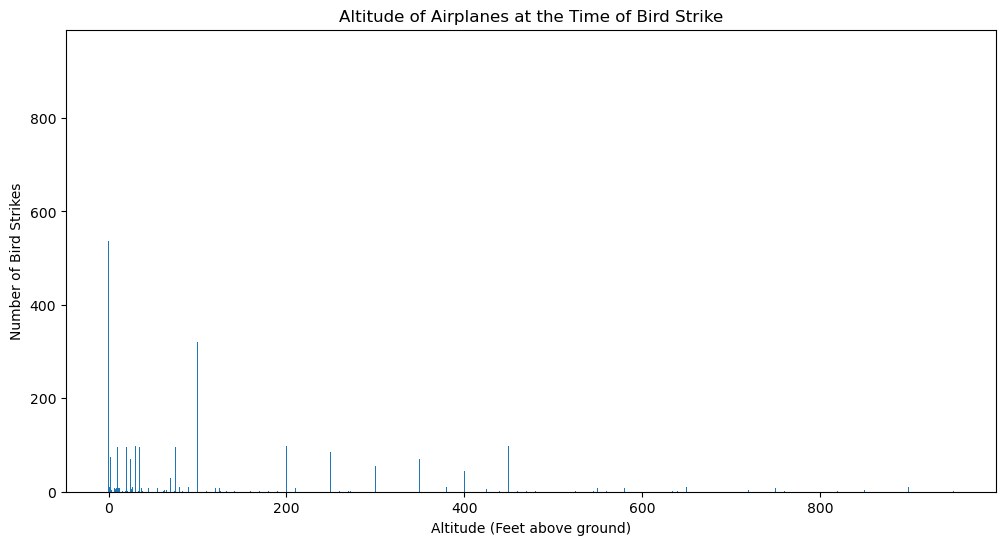

In [15]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Altitude (Feet above ground)')
plt.ylabel('Number of Bird Strikes')
plt.show()

#### Phase of flight at the time of the strike.

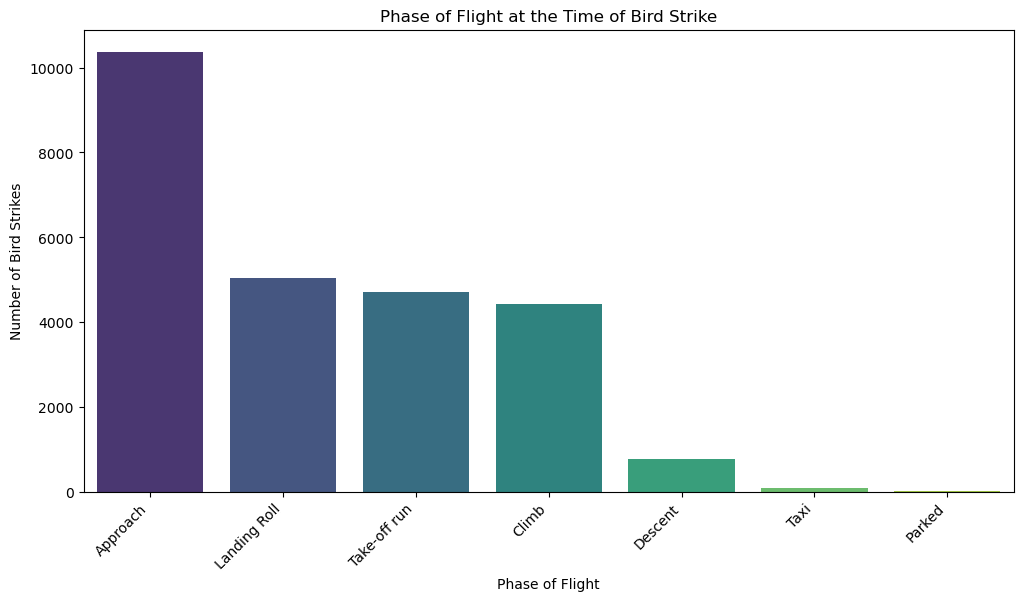

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Phase of Flight at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Average Altitude of the aeroplanes in different phases at the time of strike


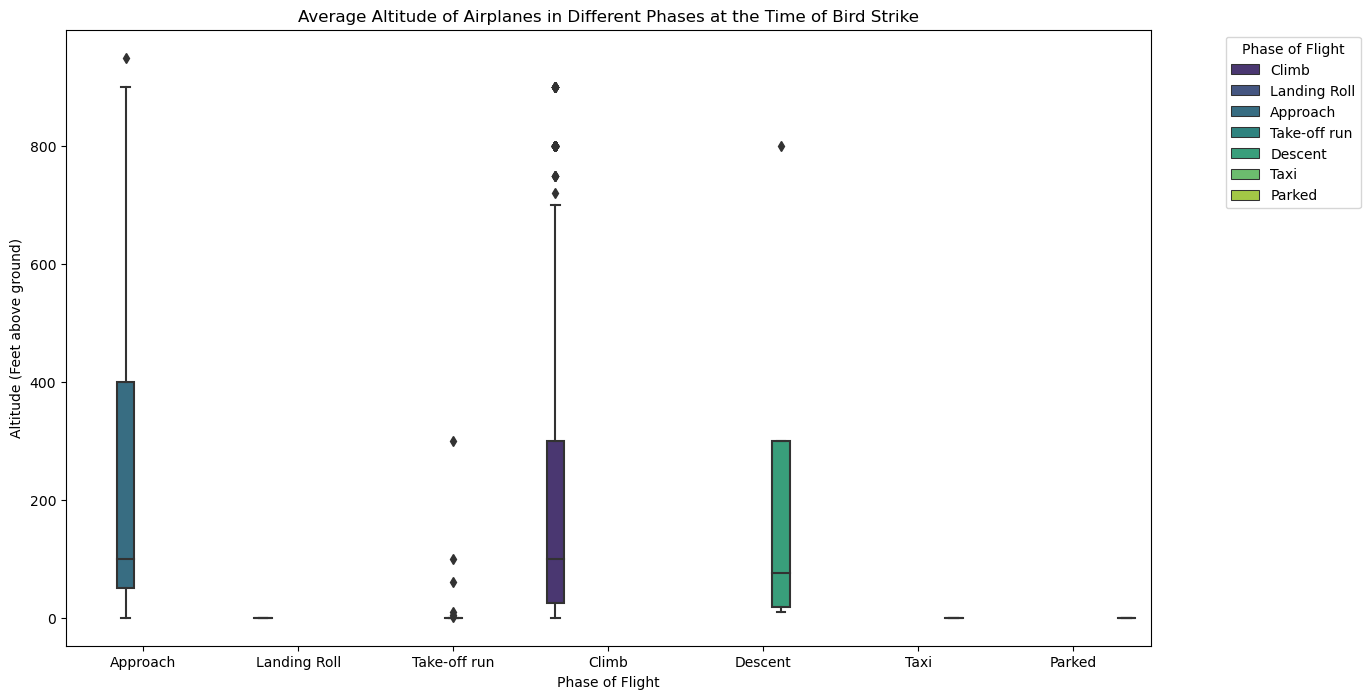

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df, 
            order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude (Feet above ground)')
plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Effect of Bird Strikes & Impact on Flight

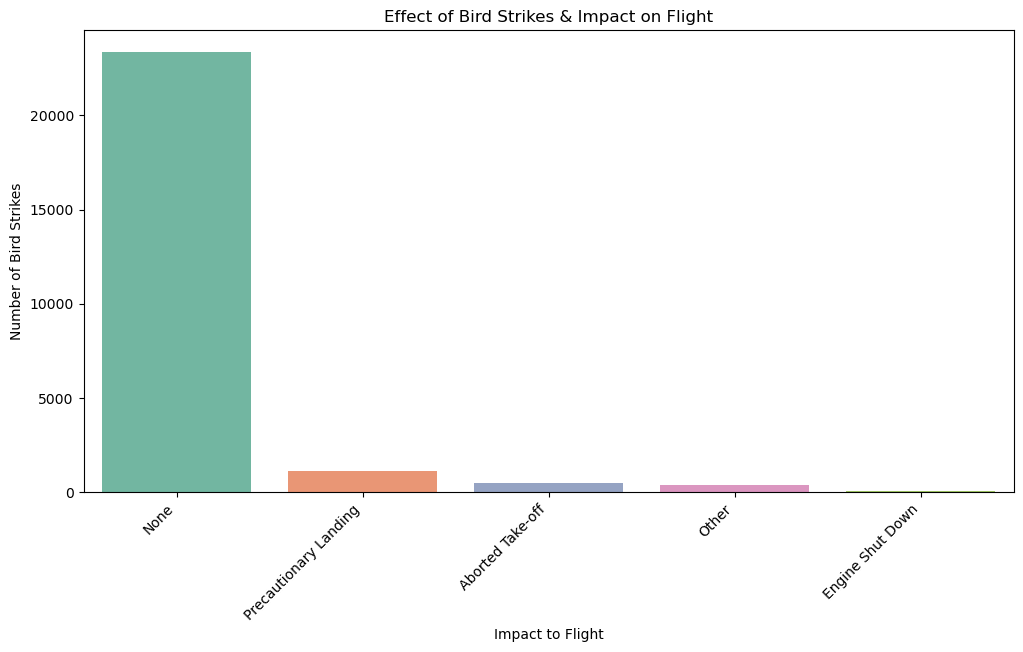

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Effect of Strike at Different Altitude

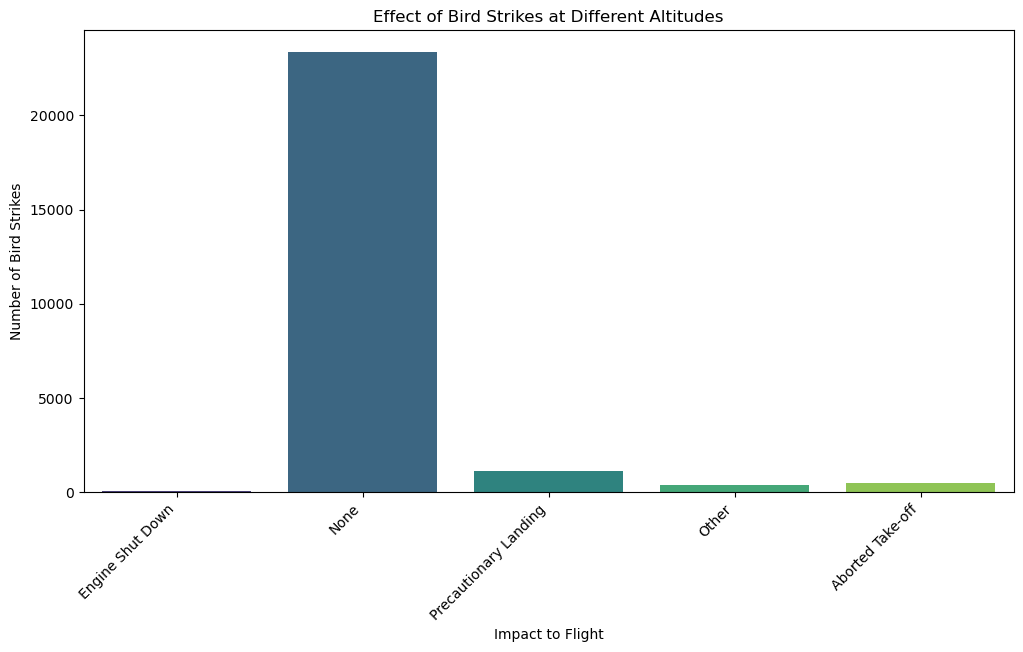

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Were Pilots Informed? & Prior Warning and Effect of Strike Relation

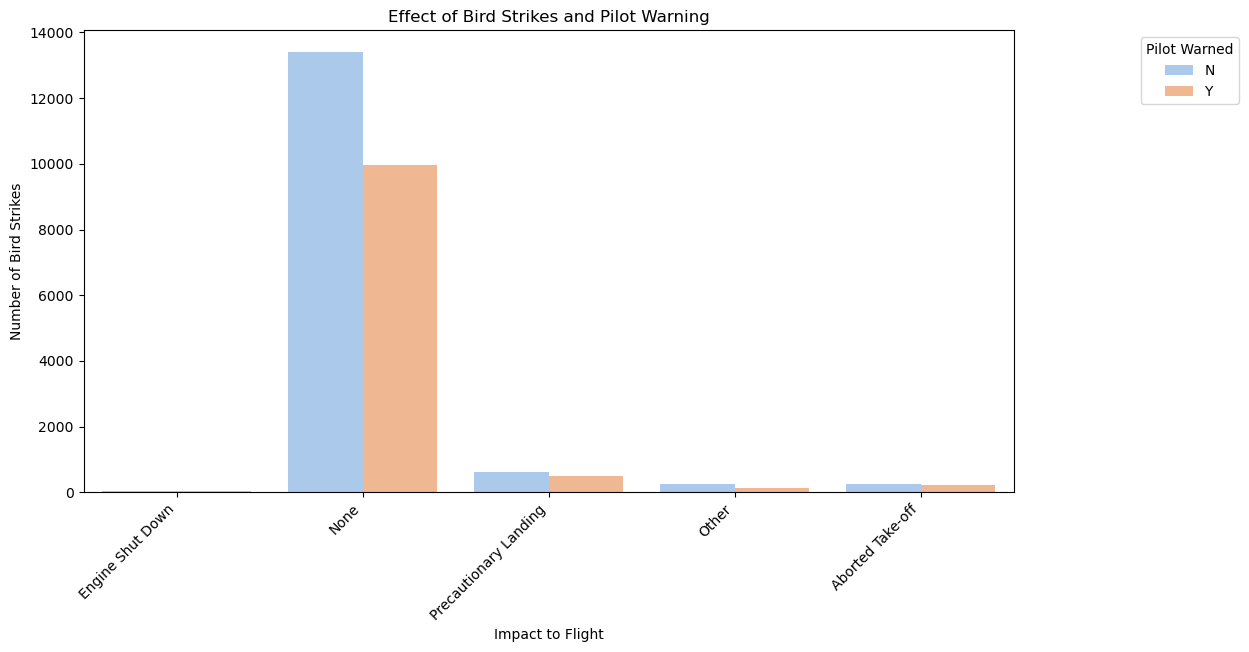

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
plt.title('Effect of Bird Strikes and Pilot Warning')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

#### Modular Format

In [11]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [17]:
def visualize_number_of_strikes_over_years(df):
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    df['Year'] = df['FlightDate'].dt.year
    plt.figure(figsize=(12, 6))
    plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Wildlife: Number Struck Actual')
    plt.title('Number of Bird Strikes Over the Years')
    plt.show()

In [18]:
def yearly_analysis_and_strikes_in_us(df):
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    df['Year'] = df['FlightDate'].dt.year

    non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario',
                      'Newfoundland and Labrador', 'Alberta', 'Saskatchewan']

    df_us = df[~df['Origin State'].isin(non_us_states)]

    plt.figure(figsize=(16, 8))
    sns.countplot(x='Year', hue='Origin State', data=df_us)
    plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
    plt.xlabel('Year')
    plt.ylabel('Number of Bird Strikes')
    plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [19]:
def top_us_airlines_with_most_strikes(df):
    df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]

    plt.figure(figsize=(12, 6))
    top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
    sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
    plt.title('Top 10 US Airlines with Most Bird Strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Aircraft: Airline/Operator')
    plt.show()

In [20]:
def top_airports_with_most_incidents(df):
    plt.figure(figsize=(14, 9))
    top_airports = df['Airport: Name'].value_counts().nlargest(50)
    sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
    plt.title('Top 50 Airports with Most Bird Strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Airport: Name')
    plt.show()

In [21]:
def yearly_cost_incurred_due_to_strikes(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')
    plt.yscale('log')
    plt.title('Yearly Cost Incurred due to Bird Strikes')
    plt.xlabel('Year')
    plt.ylabel('Total Cost ($)')
    plt.show()

In [22]:
def bird_strikes_distribution_across_phases(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [23]:
def altitude_of_airplanes_at_time_of_strike(df):
    df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

    plt.figure(figsize=(12, 6))
    plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
    plt.title('Altitude of Airplanes at the Time of Bird Strike')
    plt.xlabel('Altitude (Feet above ground)')
    plt.ylabel('Number of Bird Strikes')
    plt.show()

In [24]:
def phase_of_flight_at_time_of_strike(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Phase of Flight at the Time of Bird Strike')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [25]:
def average_altitude_of_airplanes_in_different_phases(df):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df,
                order=df['When: Phase of flight'].value_counts().index, palette='viridis')
    plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Altitude (Feet above ground)')
    plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

In [26]:
def effect_of_bird_strikes_and_impact_on_flight(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2')
    plt.title('Effect of Bird Strikes & Impact on Flight')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [27]:
def effect_of_strike_at_different_altitude(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', data=df, palette='viridis')
    plt.title('Effect of Bird Strikes at Different Altitudes')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [28]:
def pilot_warning_and_effect_of_strike_relation(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
    plt.title('Effect of Bird Strikes and Pilot Warning')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

In [29]:
file_path = "Bird Strikes.csv"
bird_strikes_df = load_data(file_path)

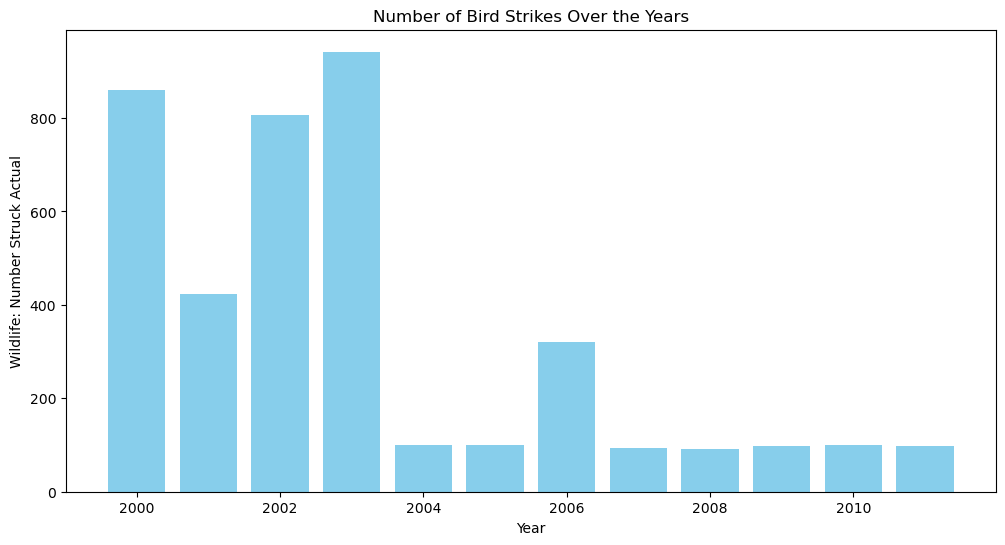

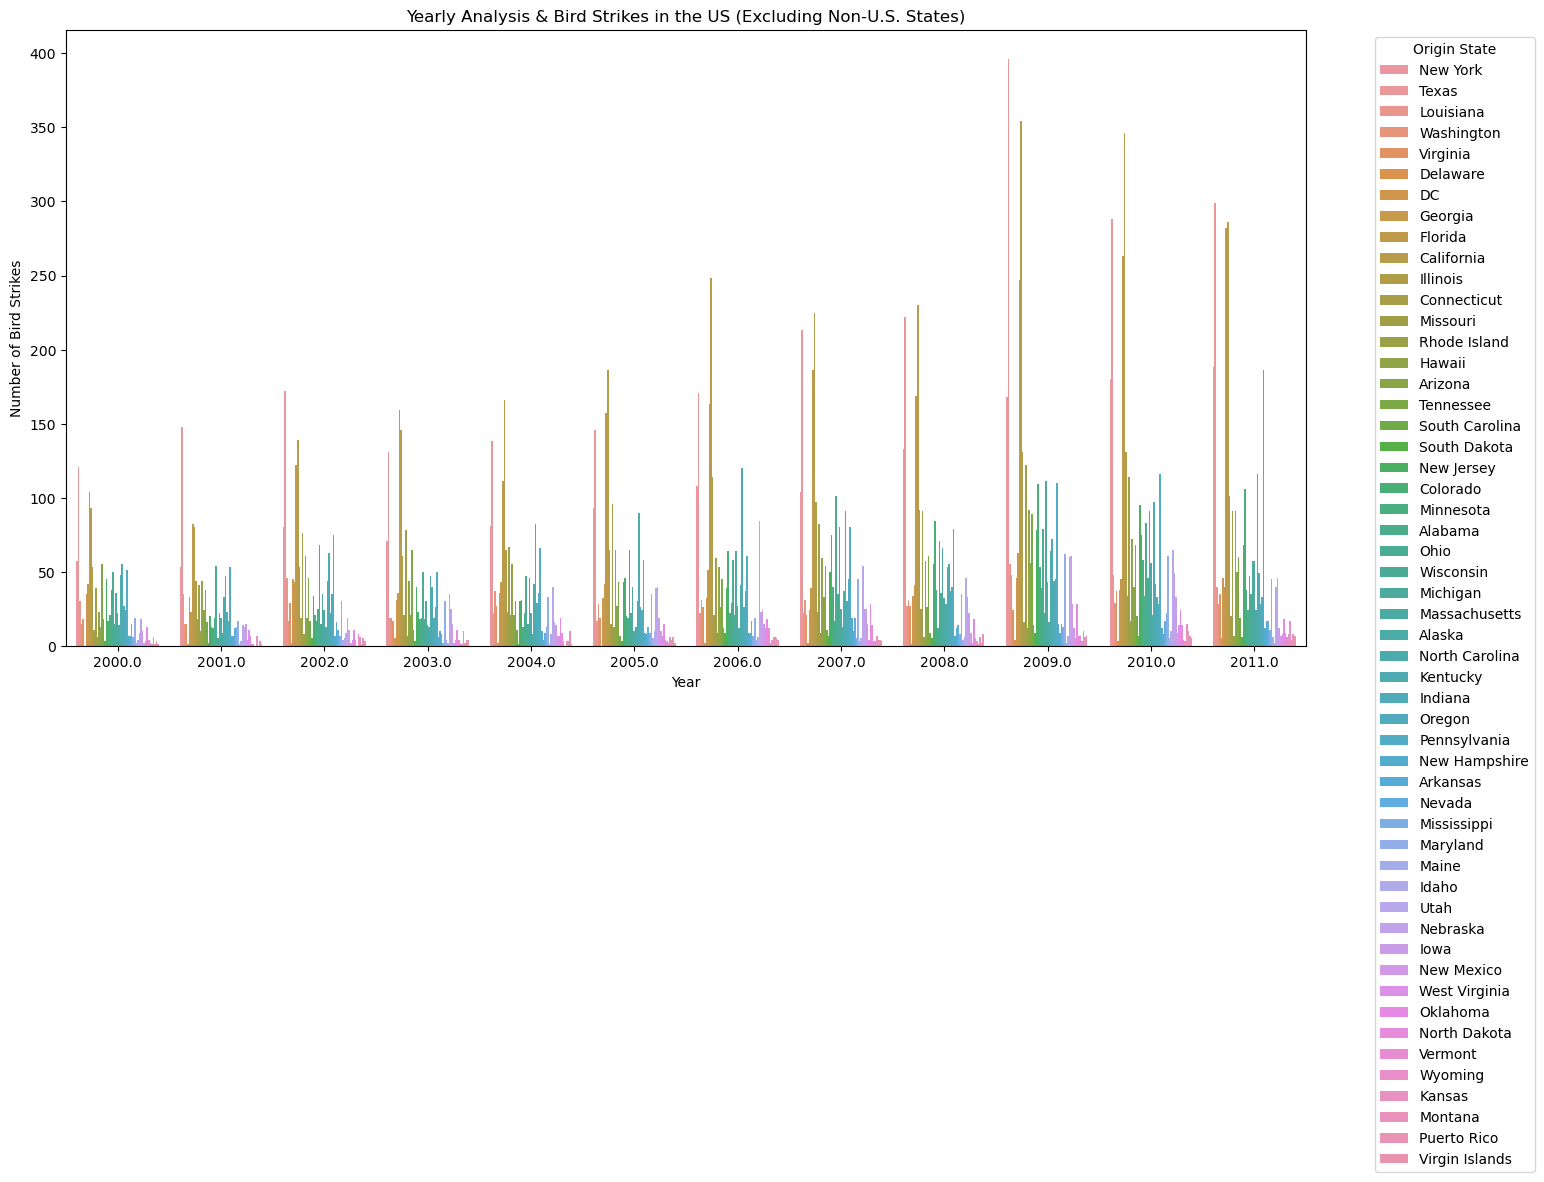

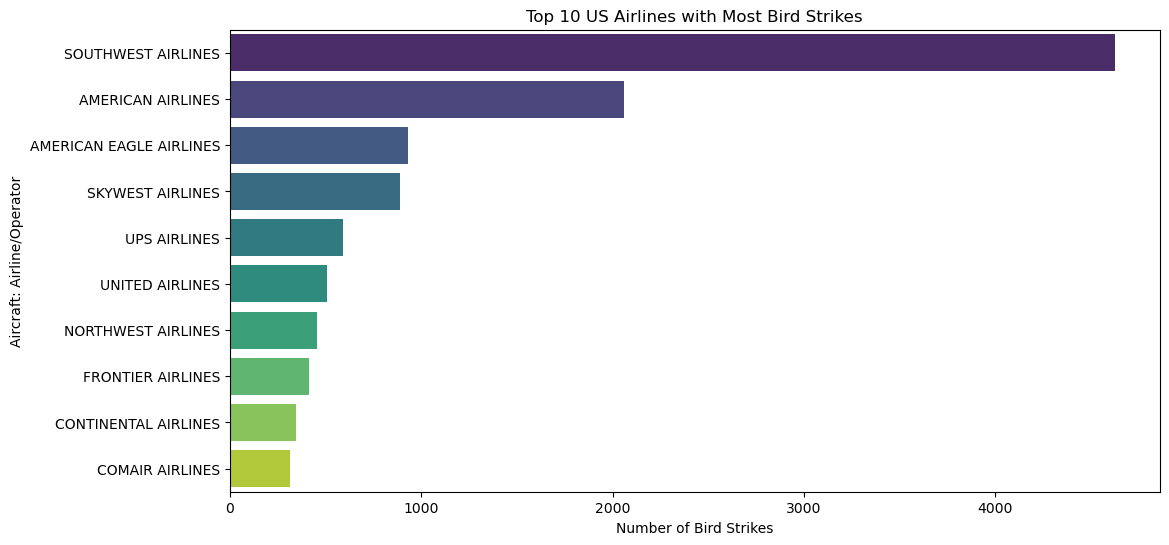

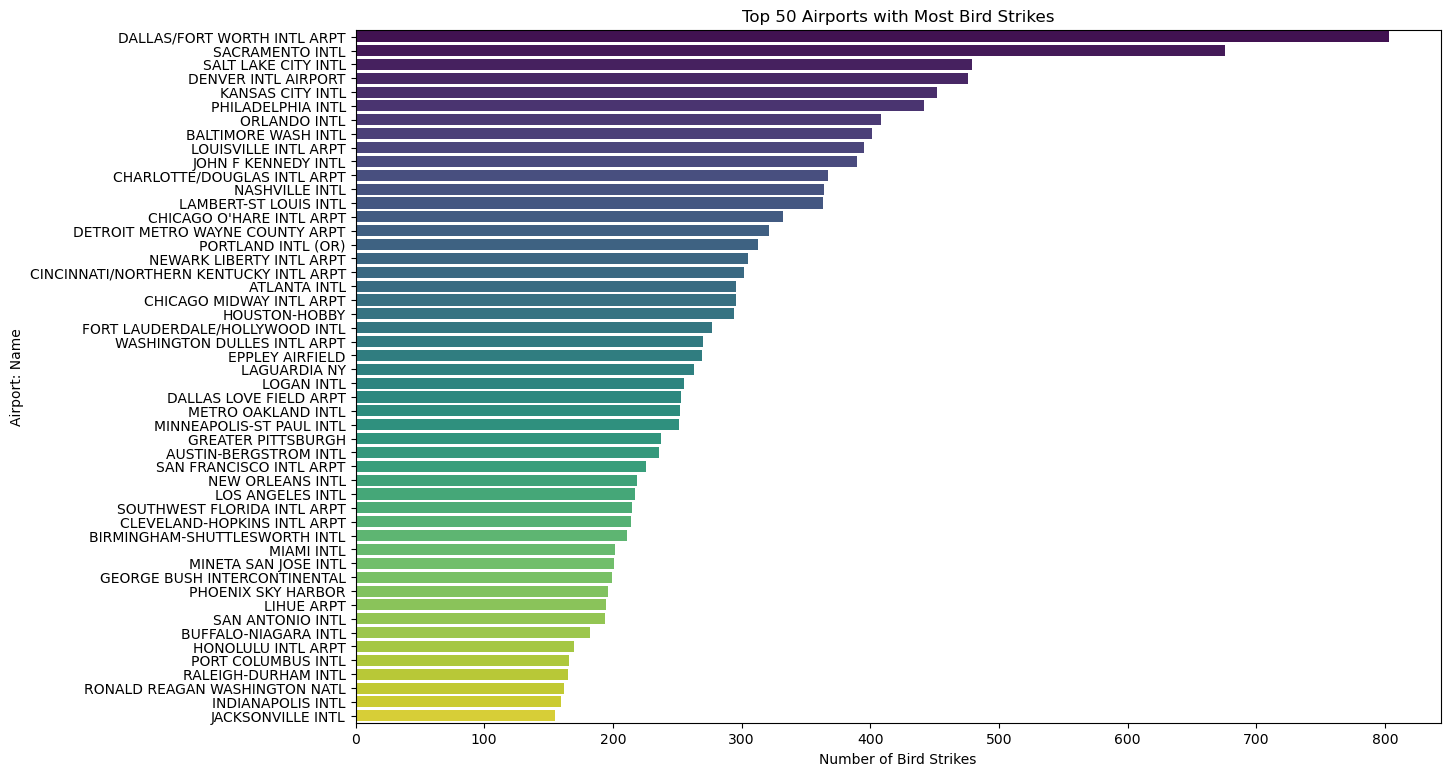

C:\Users\admin\AppData\Local\Temp\ipykernel_9200\3628955046.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, ci=None, marker='o', color='blue')


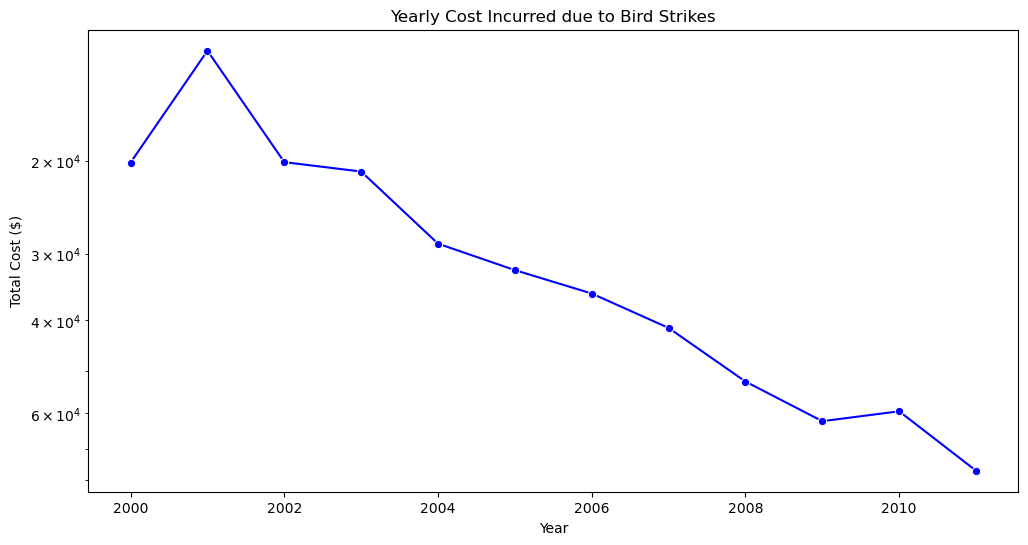

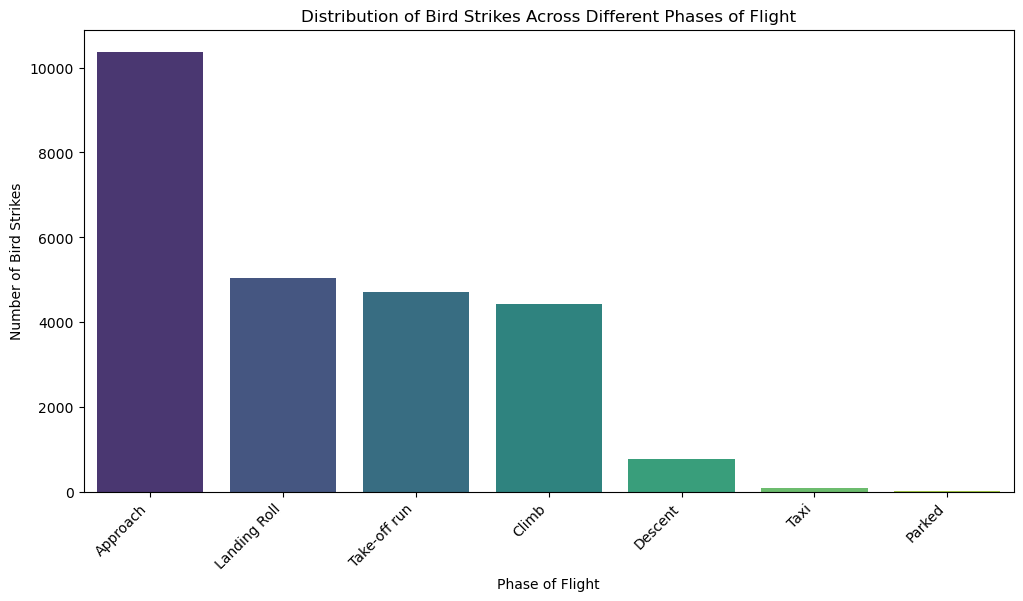

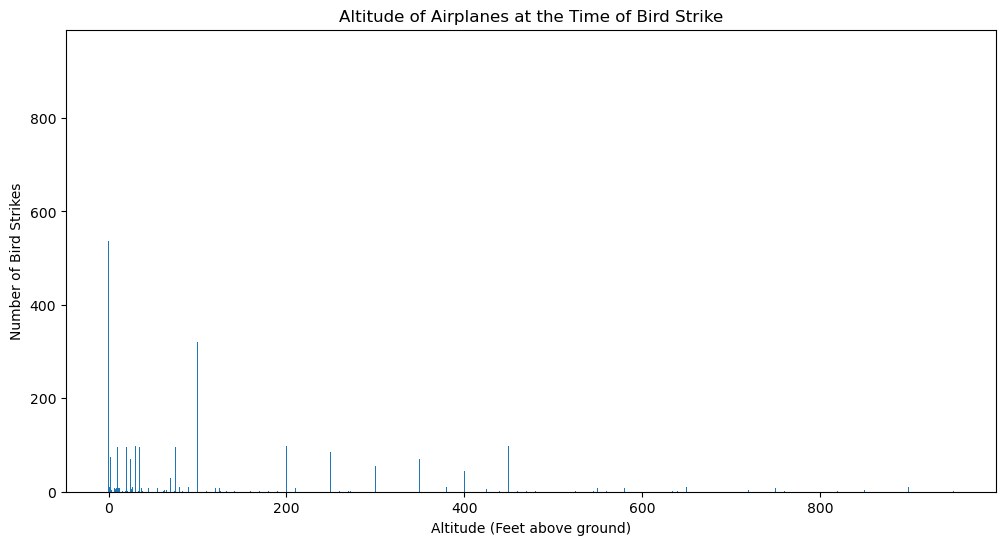

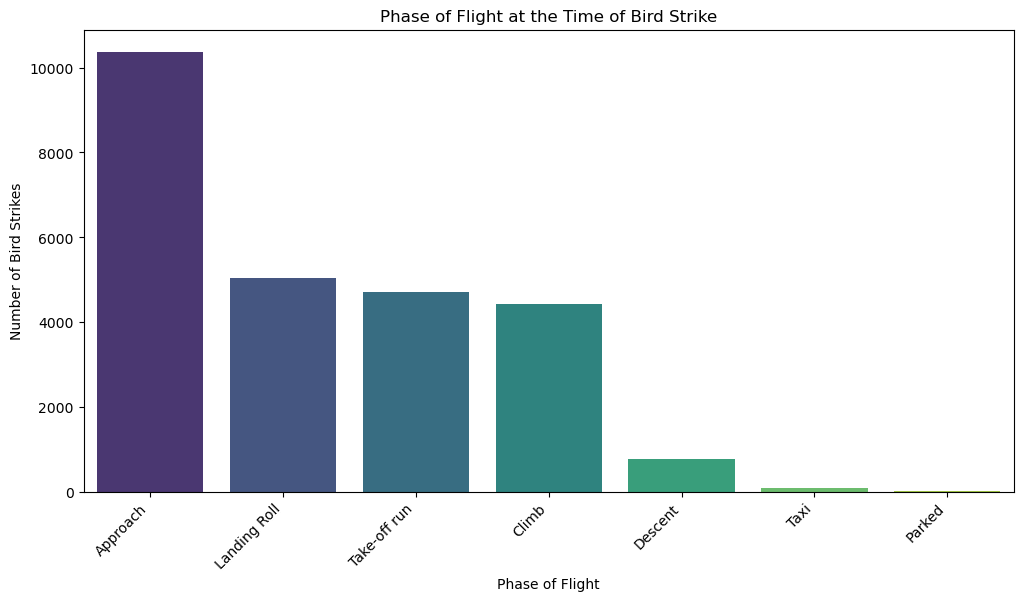

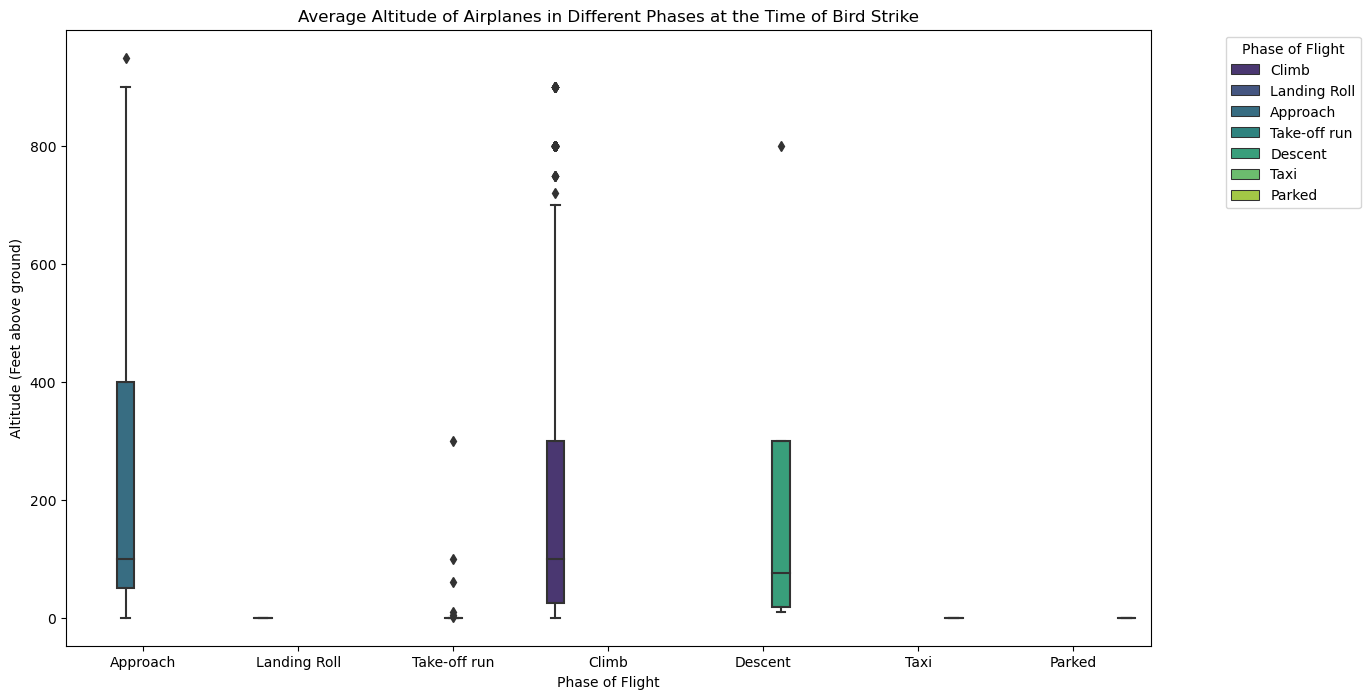

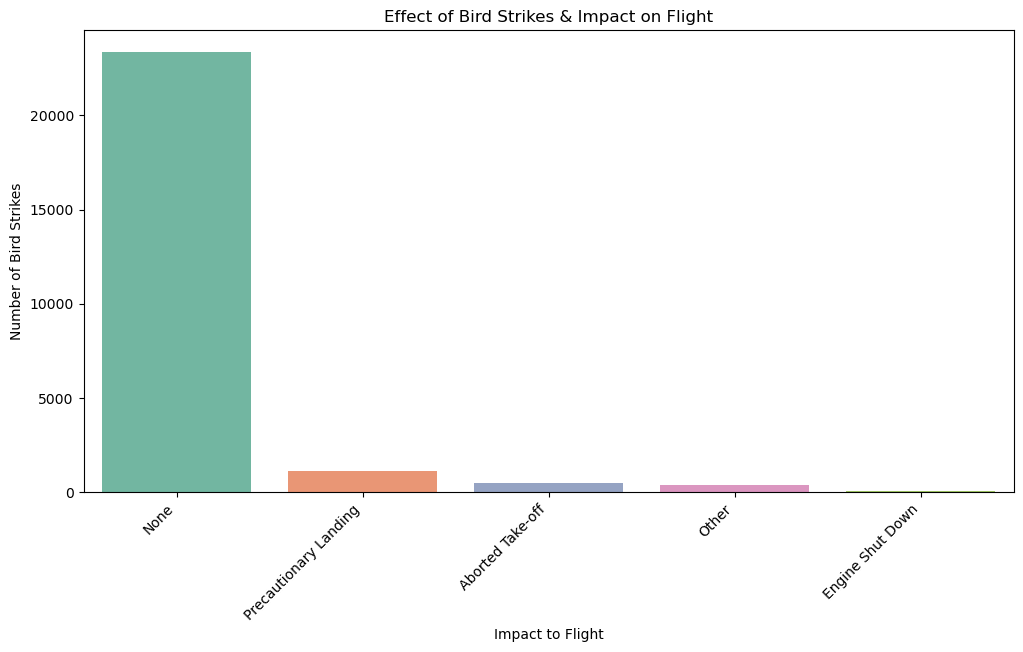

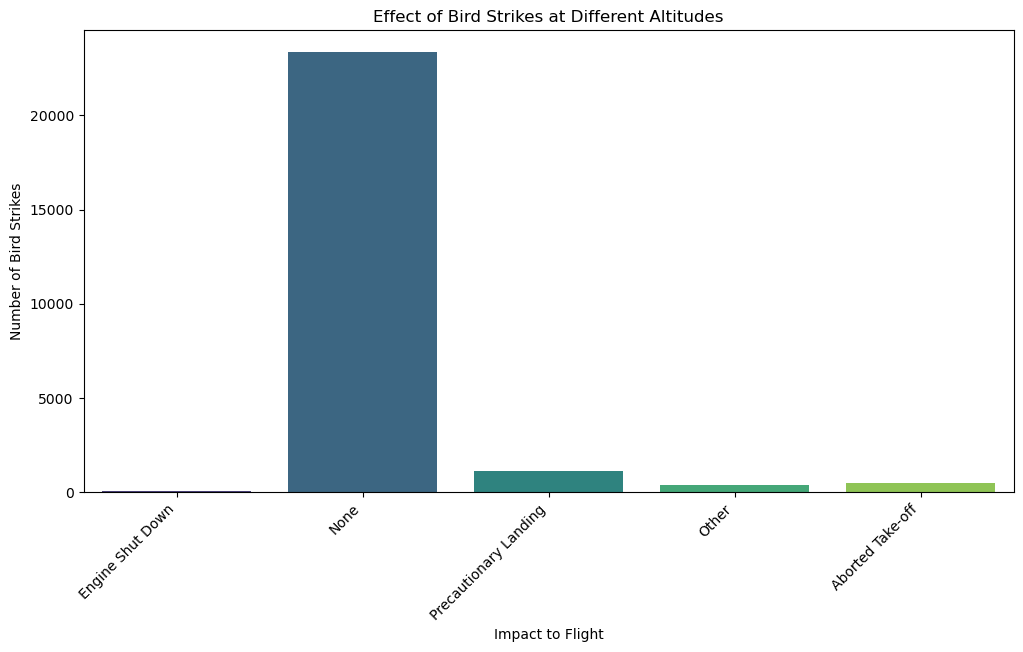

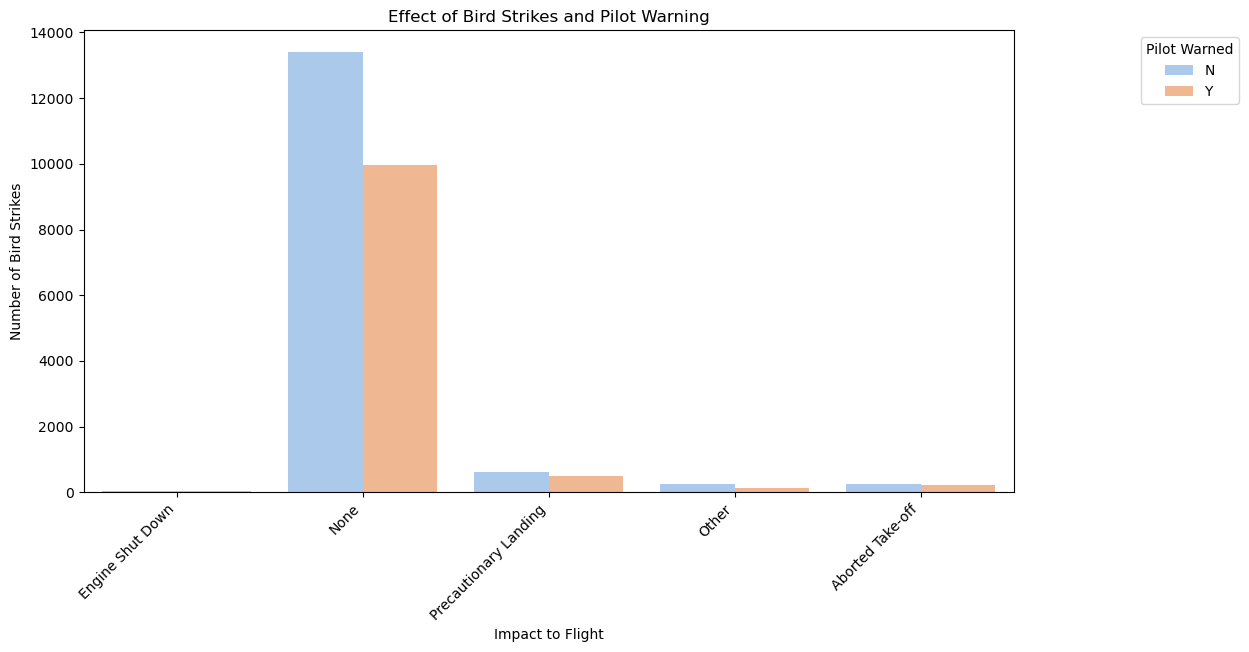

In [30]:
visualize_number_of_strikes_over_years(bird_strikes_df)
yearly_analysis_and_strikes_in_us(bird_strikes_df)
top_us_airlines_with_most_strikes(bird_strikes_df)
top_airports_with_most_incidents(bird_strikes_df)
yearly_cost_incurred_due_to_strikes(bird_strikes_df)
bird_strikes_distribution_across_phases(bird_strikes_df)
altitude_of_airplanes_at_time_of_strike(bird_strikes_df)
phase_of_flight_at_time_of_strike(bird_strikes_df)
average_altitude_of_airplanes_in_different_phases(bird_strikes_df)
effect_of_bird_strikes_and_impact_on_flight(bird_strikes_df)
effect_of_strike_at_different_altitude(bird_strikes_df)
pilot_warning_and_effect_of_strike_relation(bird_strikes_df)